<a href="https://colab.research.google.com/github/JoanNjoki/House-Pricing-Analysis/blob/main/Moringa_Data_Science_CORE_W7_Independent_Project_2021_05_Joan_Mwangi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Pricing Data Analysis**

## 1. Defining the Question

### a) Main objective
To identify  factors that affect house pricing by creating regression models that would accurately predict the sales of houses with the given predictor variables.  


### b) Metric for Success
Successfully identify predictor variables that affect  house pricing

### c) Context 
Identifying factors that aids in understanding price fluctuations in the real estate industry.

### d) Recording the Experimental Design
* find and deal with outliers,anomalies, and missing data within the dataset
* perform univariate, bivariate, and multivariate analysis
* perform the following regression analysis:
  * Multiple Linear Regression
  * Quantile regression
  * Ridge regression
  * Lasso regression
  * Elastic Net regression
* recommend based on the findings
* create residual plots for the models
* check for heteroscedacticity using bartlett's test
*  challenge the solution



### e) Data Relevance
The variables within the dataset such as number of bedrooms, condition of the houses are relevant in predicting house pricing

## 2. Reading the Data

In [97]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset into the environment
housing = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')

## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#
housing.shape

(21613, 20)

there are 21613 rows and 20 columns 

In [4]:
# Previewing the top of our dataset
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Previewing the bottom of our dataset 
housing.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
# Checking whether each column has an appropriate datatype
housing.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

All columns have the right datatype

### 4. Tidying the Dataset

In [7]:
#checking columns names 
housing.columns
#the columns are correctly labelled

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Figure size 1152x1152 with 0 Axes>

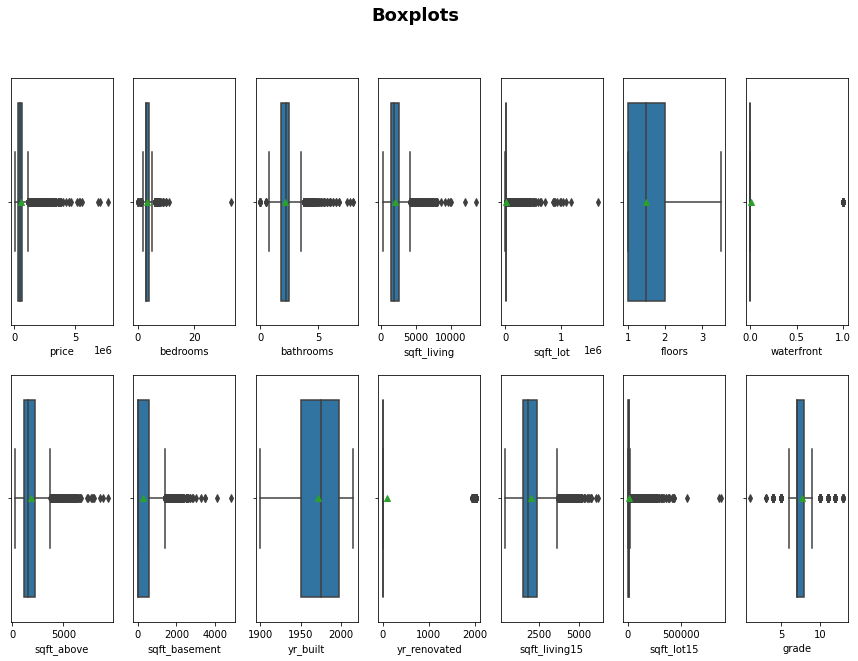

In [8]:
#checking for outliers in price, bedrooms, bathrooms,sqft living, sqft lot columns
fig = plt.figure(figsize= (16,16),edgecolor='red')
fig,axes =plt.subplots(2,7, figsize=(15,10))
fig.suptitle('Boxplots',weight='bold',fontsize=18)
sns.boxplot(data=housing,x=housing['price'],ax=axes[0,0],showmeans=True)
sns.boxplot(data=housing,x=housing['bedrooms'],ax=axes[0,1],showmeans=True)
sns.boxplot(data=housing,x=housing['bathrooms'],ax=axes[0,2],showmeans=True)
sns.boxplot(data=housing,x=housing['sqft_living'],ax=axes[0,3],showmeans=True)
sns.boxplot(data=housing,x=housing['sqft_lot'],ax=axes[0,4],showmeans=True)
sns.boxplot(data=housing,x=housing['floors'],ax=axes[0,5],showmeans=True)
sns.boxplot(data=housing,x=housing['waterfront'],ax=axes[0,6],showmeans=True)
sns.boxplot(data=housing,x=housing['sqft_above'],ax=axes[1,0],showmeans=True)
sns.boxplot(data=housing,x=housing['sqft_basement'],ax=axes[1,1],showmeans=True)
sns.boxplot(data=housing,x=housing['yr_built'],ax=axes[1,2],showmeans=True)
sns.boxplot(data=housing,x=housing['yr_renovated'],ax=axes[1,3],showmeans=True)
sns.boxplot(data=housing,x=housing['sqft_living15'],ax=axes[1,4],showmeans=True)
sns.boxplot(data=housing,x=housing['sqft_lot15'],ax=axes[1,5],showmeans=True)
sns.boxplot(data=housing,x=housing['grade'],ax=axes[1,6],showmeans=True)

Outliers within this dataset will be essential for modelling

In [9]:
#checking how many outliers are going to be retained within the dataset using the 95% upper bound and lower bound
Q1 = housing.quantile(0.05)
Q3 = housing.quantile(0.95)
IQR = Q3 - Q1
housing_out = housing[~((housing < (Q1 - 1.5 * IQR)) | (housing > (Q3 + 1.5 * IQR))).any(axis=1)]
print(housing_out.shape)
print(housing.shape)

(19998, 20)
(21613, 20)


In [10]:
#identiying the unique entried within categorical columns
unique_entries =housing[['grade','view','waterfront','yr_renovated','yr_built']] 
uniques = {col: housing[col].unique() for col in unique_entries}
uniques

{'grade': array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1]),
 'view': array([0, 3, 4, 2, 1]),
 'waterfront': array([0, 1]),
 'yr_built': array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
        1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
        1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
        1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
        1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
        1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
        1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
        1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
        1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
        1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
        2015, 1934, 1938, 1919, 1906, 1935]),
 'yr_renovated': array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 

No anomalies were detected within the categorical variables

In [11]:
#checking for missing data
housing.isnull().sum().sum()

0

there are no null values

In [12]:
#dropping the id column since it will not be used in our analysis
housing_out= housing.drop(columns =['id'],axis=1)
housing_out.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [13]:
#checking for duplicates
housing_out.duplicated().sum()
#there are 5 duplicates within the dataset
house = housing_out.drop_duplicates()
house.duplicated().sum()

0

There are 5 duplicates within the dataset which have been dropped.

In [14]:
#exporting the clean dataset
house.to_csv('Cleaned Housing dataset.csv')

Exporting the cleaned dataset and with the label ---*Cleaned Housing Dataset*

## 5. Exploratory  Data Analysis

### Univariate Analysis

> #### Histograms

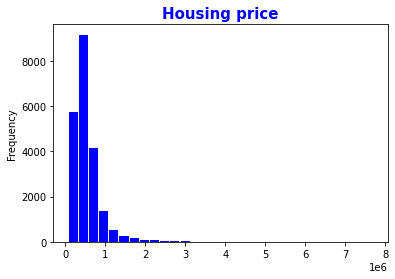

In [15]:
# Ploting the univariate summaries and recording our observations
house['price'].plot.hist(bins=30, rwidth=0.9,
                   color='blue')
plt.title('Housing price',fontsize=15,color='blue',weight='bold')
plt.show()

the highest housing price is over 8,000

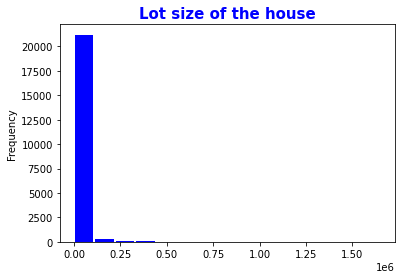

In [16]:
house['sqft_lot'].plot.hist(bins=15, rwidth=0.9,
                   color='blue')
plt.title('Lot size of the house',fontsize=15,color='blue',weight='bold')
plt.show()

lot space with the highest frequency  is over 20,000 sqft

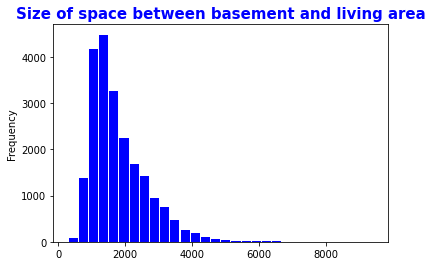

In [17]:

house['sqft_above'].plot.hist(bins=30, rwidth=0.9,
                   color='blue')
plt.title('Size of space between basement and living area',fontsize=15,color='blue',weight='bold')
plt.show()

the space above the housing with the highest frequency is over 4000

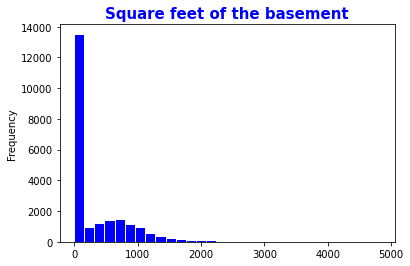

In [18]:
house['sqft_basement'].plot.hist(bins=30, rwidth=0.9,
                   color='blue')
plt.title('Square feet of the basement',fontsize=15,color='blue',weight='bold')
plt.show()

the basement space with the highest frequency is over 12,000

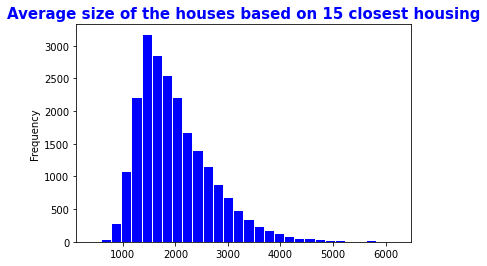

In [19]:
house['sqft_living15'].plot.hist(bins=30, rwidth=0.9,
                   color='blue')
plt.title('Average size of the houses based on 15 closest housing',fontsize=15,color='blue',weight='bold')
plt.show()

the living space with the highest frequency is over 3000

> #### Barplots

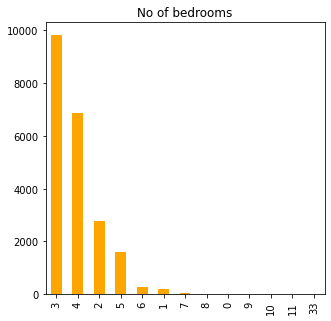

In [20]:
#bar graph of no of bedrooms
house['bedrooms'].value_counts().plot(kind='bar', figsize=(5,5),title='No of bedrooms',color='orange')
plt.show()

 The most popular no of bedrooms is 3

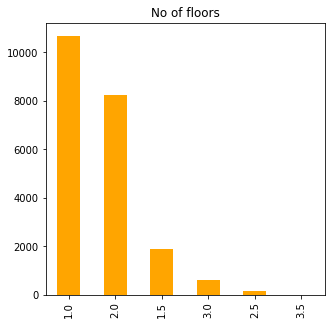

In [21]:
#bar graph of no of bedrooms
house['floors'].value_counts().plot(kind='bar', figsize=(5,5),title='No of floors',color='orange')
plt.show()


The  floors with the highest record is 1.0

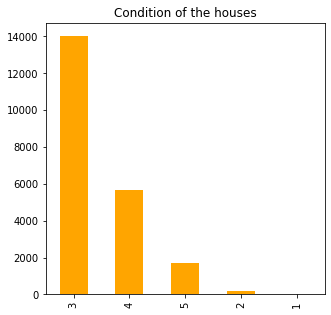

In [22]:
#bar graph of no of bedrooms
house['condition'].value_counts().plot(kind='bar', figsize=(5,5),title='Condition of the houses',color='orange')
plt.show()


The  condition with the highest record is 3

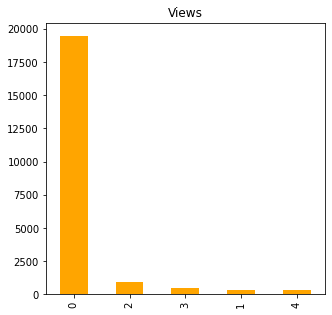

In [23]:
#bar graph of no of bedrooms
house['view'].value_counts().plot(kind='bar', figsize=(5,5),title='Views',color='orange')
plt.show()

The  view with the highest record is 0

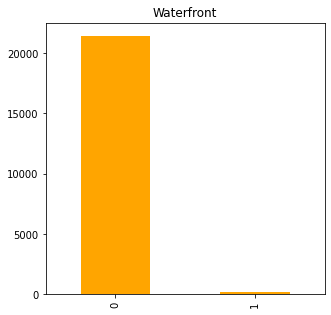

In [24]:
#bar graph of no of bedrooms
house['waterfront'].value_counts().plot(kind='bar', figsize=(5,5),title='Waterfront',color='orange')
plt.show()

The  waterfront with the highest record is in category 0

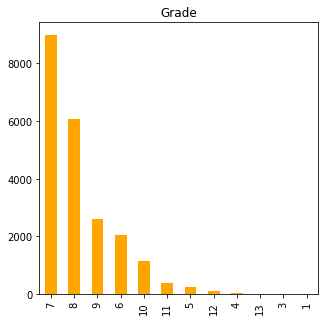

In [25]:
#bar graph of no of bedrooms
house['grade'].value_counts().plot(kind='bar', figsize=(5,5),title='Grade',color='orange')
plt.show()

The  grade of the housing with the highest record is 7

> #### Frequency Tables

In [26]:
#bar graph of no of bedrooms
house['yr_built'].value_counts().sort_values(ascending=False)

2014    558
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

2014 had the highest records of houses build with 558 records

In [27]:
house['yr_renovated'].value_counts().sort_values(ascending=False)

0       20695
2014       91
2013       37
2003       36
2000       35
        ...  
1951        1
1948        1
1934        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

2014 is also the year with the most renovation with 91,however the 20694 houses dont have records of which 
year renovation took place

In [28]:
#measures of central tendency
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160800e+04,21608.000000,21608.000000,21608.000000,2.160800e+04,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,5.401924e+05,3.370927,2.114738,2079.958950,1.510962e+04,1.494146,0.007544,0.234219,3.409478,7.656655,1788.414846,291.544104,1970.999907,84.330155,98077.942614,47.560050,-122.213894,1986.583164,12770.108340
std,3.673996e+05,0.930103,0.770238,918.505805,4.142491e+04,0.539910,0.086527,0.766169,0.650782,1.175484,828.141155,442.612560,29.371463,401.517026,53.506883,0.138578,0.140830,685.421474,27307.006892
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.218375e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470875,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230500,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The numerical columns dont have minimum values with entries below 0 apart of latitude and longitude

### Bivariate Analysis

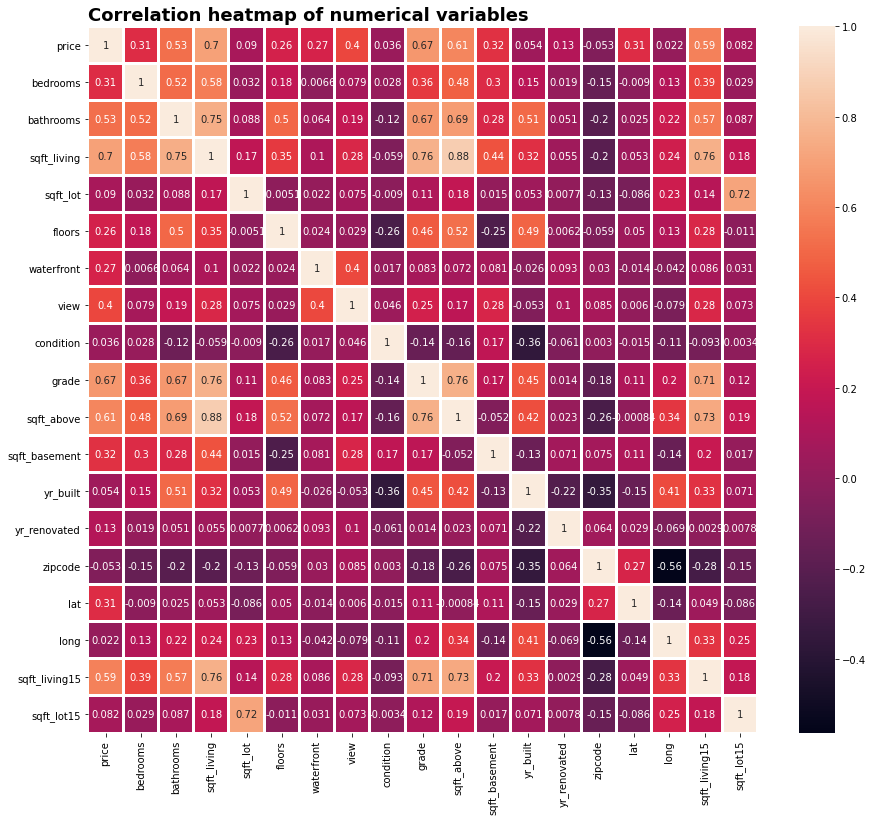

In [29]:
#heat map showing correlation among variables
corr = house.corr()
plt.figure(figsize=(15,13))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidth=2.0,annot=True)
plt.title('Correlation heatmap of numerical variables',fontsize=18,weight='bold',loc='left')
plt.show()

* Price is positively correlated with number of bathrooms,square foot living,grade, and square foot above.
* Number of bedrooms is positively correlated with bathrooms and square foot above.
* Square foot living of the 15 closest houses is positively correlated with square feet above and grade.
* Year built is negatively correlated with condition, and basement.
* Finally, condition is negatively correlated with the number of floors within the houses.


### Scatterplots

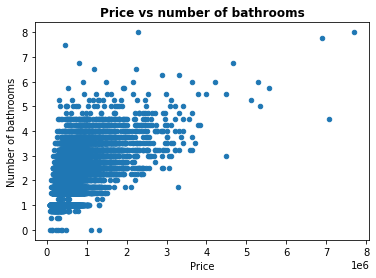

In [30]:
#scatter plots of price and bathroom
house.plot(x='price',y='bathrooms',kind='scatter')
plt.title('Price vs number of bathrooms',fontsize=12,weight='bold')
plt.ylabel('Number of bathrooms')
plt.xlabel('Price')
plt.show()

There is a moderate correlation between price and number of prices

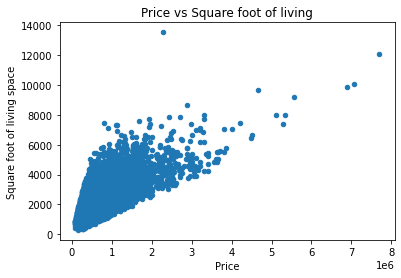

In [31]:
#scatter plot of house pricing and square of living space
house.plot(x='price',y='sqft_living',kind='scatter')
plt.title('Price vs Square foot of living')
plt.ylabel('Square foot of living space')
plt.xlabel('Price')
plt.show()

There is a positive correlation between price and square foot of the living space 

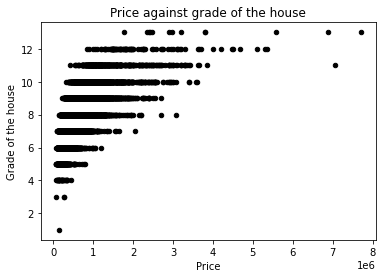

In [32]:
#scatter plot of grade against house price
house.plot(x='price',y='grade',kind='scatter',color='black')
plt.title('Price against grade of the house')
plt.ylabel('Grade of the house')
plt.xlabel('Price')
plt.show()

There is a positive correlation between grade and prices, seen in the steps in the different grades.

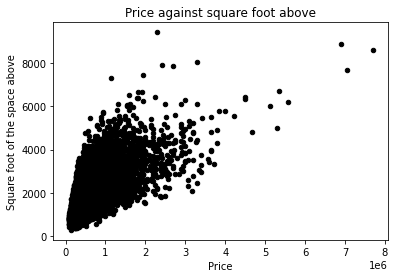

In [33]:
#scatter plot of price vs square foot above
house.plot(x='price',y='sqft_above',kind='scatter',color='black')
plt.title('Price against square foot above')
plt.ylabel('Square foot of the space above')
plt.xlabel('Price')
plt.show()

Scatterplot of square foot of the space above and price have a similar shape to that of the square foot of the living space, all with a positive correlation with price

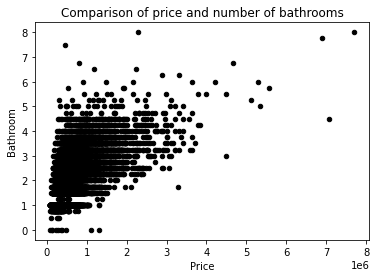

In [34]:
#scatterplot of bedrooms and bathrooms
house.plot(x='price',y='bathrooms',kind='scatter',color='black')
plt.title('Comparison of price and number of bathrooms')
plt.ylabel('Bathroom')
plt.xlabel('Price')
plt.show()

There is a positive correlation between number of bathrooms and prices

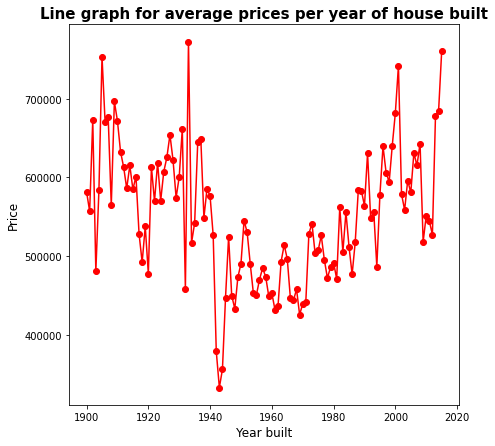

In [35]:
year_built = house.groupby('yr_built')['price'].mean().reset_index(name= 'Average price per year of house built')

# Plot a line graph using the above grouped data 
x = year_built['yr_built']
y= year_built['Average price per year of house built']
plt.figure(figsize=(7,7))
plt.title("Line graph for average prices per year of house built",weight='bold',fontsize=15)
plt.plot(x,y, color = 'red', marker='o', linestyle = '-')
plt.xlabel('Year built',fontsize=(12))
plt.ylabel('Price',fontsize=(12))
plt.show()

>> The prices of housing was high from 1900 to around 1920, where they dropped slightly in 1920s, and then decreased in the 1930s before taking a sharp fall in in mid 1940s. The prices have since stabilised without major spikes from mid 1940s to 2020.

### Multivariate Analysis:
>> Principal Component Analysis

In [36]:
X = house.drop('price',1)
y = house['price']
#splitting the dataset into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 
#normalizing the feature set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#using pca
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
pca.explained_variance_ratio_

array([2.92634585e-01, 1.25427095e-01, 1.05457021e-01, 7.57823117e-02,
       6.67203098e-02, 5.51731146e-02, 4.85531474e-02, 4.62780083e-02,
       3.63098752e-02, 3.20586109e-02, 2.70311218e-02, 2.20118789e-02,
       1.79339911e-02, 1.38095441e-02, 1.29560747e-02, 1.15124161e-02,
       1.03508946e-02, 6.35777185e-33])

The first three priniipal components have a high variance compared to the rest however this variance is minimal

In [37]:
#using random forest for classification 
from sklearn.ensemble import RandomForestClassifier
classified = RandomForestClassifier(max_depth=2,random_state=42)
classified.fit(X_train,y_train)
y_pred = classified.predict(X_test)

In [38]:
#evaluating performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test,y_pred)
print(confusion)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score:',accuracy)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy score: 0.0071726052753354926


The accuracy score for the pca is  0.71% which means that pca has has unable to correctly classify values within this dataset.

## 7. Implementing the Solution

### Checking for multicollinearity using VIF

In [39]:
#checking for multicollinearity
corr = house.corr()
pd.DataFrame(np.linalg.inv(corr.values),index= corr.index,columns = corr.columns)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,3.331152,0.301698,-0.286949,-1.043460e+00,-0.048124,-0.033122,-0.457064,-0.368434,-0.156072,-1.023203,-4.187807e-01,-9.965264e-02,0.698282,-0.072941,0.282677,-0.757515,0.274198,-0.134711,0.094665
bedrooms,0.301698,1.679355,-0.487414,-1.176450e+00,0.044970,0.046899,0.021678,0.081061,-0.064752,0.214121,6.440149e-02,2.842323e-02,0.197724,0.039191,0.105766,-0.017749,0.042365,0.013152,0.093987
bathrooms,-0.286949,-0.487414,3.376068,-1.760721e+00,-0.019907,-0.672697,0.049465,-0.010620,-0.123837,-0.180120,4.308178e-01,-1.783026e-01,-0.995918,-0.254161,0.017436,0.024210,0.030220,0.103708,0.063268
sqft_living,-1.046791,-1.177154,-1.763580,-1.596554e+13,-0.154621,0.551072,-0.276797,0.517300,-0.461670,-1.355850,1.439481e+13,7.693525e+12,0.440198,-0.108225,-0.376113,0.244743,-0.062350,-0.928253,-0.118412
sqft_lot,-0.048124,0.044970,-0.019907,-1.557089e-01,2.103202,0.045698,0.033973,-0.053791,0.032779,-0.039019,-3.926166e-02,4.110696e-02,0.088656,0.022350,-0.006663,0.064276,-0.137176,0.165854,-1.460652
floors,-0.033122,0.046899,-0.672697,5.523962e-01,0.045698,2.012191,-0.000967,-0.036468,0.091411,-0.219721,-9.892833e-01,3.546520e-01,-0.487868,-0.079223,-0.173584,-0.120054,0.161255,0.273684,0.071751
waterfront,-0.457064,0.021678,0.049465,-2.765929e-01,0.033973,-0.000967,1.266682,-0.442302,0.008595,0.189682,3.241927e-01,2.123151e-01,-0.116906,-0.055842,-0.016224,0.113750,-0.010387,0.072871,-0.031468
view,-0.368434,0.081061,-0.010620,5.165071e-01,-0.053791,-0.036468,-0.442302,1.476069,-0.003866,-0.072241,-2.758190e-01,-4.385889e-01,0.074402,-0.031054,-0.171902,0.202435,0.041630,-0.310420,-0.017944
condition,-0.156072,-0.064752,-0.123837,-4.619669e-01,0.032779,0.091411,0.008595,-0.003866,1.256772,-0.006544,5.358110e-01,1.534168e-01,0.528747,0.210328,0.148029,0.099217,-0.019739,0.082218,-0.032674
grade,-1.023203,0.214121,-0.180120,-1.359012e+00,-0.039019,-0.219721,0.189682,-0.072241,-0.006544,3.732814,3.220824e-02,3.535914e-01,-0.852826,-0.049030,-0.003655,-0.098411,0.309109,-0.870797,0.042851


There is no multicollinearity within this dataset

### Multiple Linear Regression

In [126]:
x = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y = house['price'].values.reshape(-1,1)
from sklearn.linear_model import LinearRegression
le = LinearRegression(fit_intercept=True,normalize=True)
#x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
le.fit(x,y)
y_pred_lin = le.predict(x)
from sklearn.metrics import r2_score
#making predictions
print('Mean squared error:',mean_squared_error(y,y_pred_lin))
print('Root mean squared error:',np.sqrt(mean_squared_error(y,y_pred_lin)))
print('R2 score:',np.sqrt(r2_score(y,y_pred_lin)))
print('Linear coefficients: ',le.coef_.tolist())

Mean squared error: 40519386486.312805
Root mean squared error: 201294.2783248267
R2 score: 0.8365426299317529
Linear coefficients:  [[-35775.56717884098, 41088.76364435262, 89.12127896962161, 0.12812851349400015, 6766.109342193902, 582598.1380510345, 53037.02612900228, 26450.504782342003, 96004.06737733076, 92.1868814890241, 61.07027040009647, -2622.1032881378287, 20.03611105409857, -582.6741616968056, 602893.8562143771, -214739.9354234034, 21.676551461994258, -0.38234835296315395]]


The results show that the r2_score is 0.83, which implies that 83% of price can be determined by the x variables.

> #### Residual plot: Multiple Linear Regression

In [72]:
#splitting the dataset into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
#fitting into the linear regression
le.fit(x_train,y_train)
#predicting test set
y_pred_lin = le.predict(x_test)
#getting residuals. Which is the difference between y_test(actual values) and y_pred(predicted values)
residuals = np.subtract(y_pred_lin,y_test)

#getting the mean of the variables
residuals.mean()

-4637.8310926474505

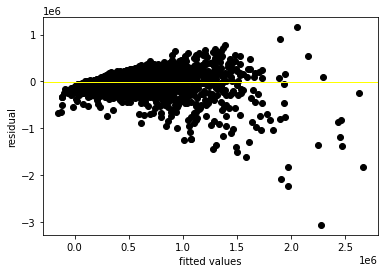

In [43]:
#plotting the residual plots
plt.scatter(y_pred_lin,residuals,color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y=residuals.mean(),color='yellow',linewidth=1)
plt.show()

> ### Testing for heteroscedasticity: Bartlett's test

In [44]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred_lin.flatten(), residuals.flatten())#used the flatten function to copy the values as one dimensional

#degrees of freedom
df = len(y_pred_lin) - 1
probability = 1 - p_value
critical_val = sp.stats.chi2.ppf(probability,df)

#deciding whether to reject or fail to reject the null hypothesis
# basing it on test value and critical value
if (test_result > critical_val):
  print('The variances are unequal')
else:
    print('The variances are homogenous')
   

The variances are homogenous


The residuals are centered around the mean which is very close to 0 and the variances homogenous

### Quantile Regression

In [117]:
#importing library 
import statsmodels.formula.api as smf
#splitting the dataset into x and y variables
x = house[['sqft_above', 'bathrooms', 'sqft_living','grade']].values
y = house.price.values.reshape(-1,1)
#specifying the  model to predict usingmedian, upper and lower bound at 75% confidence level 
mod = smf.quantreg('price ~ sqft_above+ bathrooms+ sqft_living+grade',house)

quantiles = np.arange(0.1,1,0.1)

model = []
params = []

for qt in quantiles:
  res = mod.fit(q = qt)
  model.append(res)
  params.append([qt, res.params['Intercept'], res.params['sqft_above'],res.params['bathrooms'],res.params['sqft_living'],res.params['grade']]) #+ res.conf_int().loc['x'].tolist())#.loc['x] access
#making a dataframe
params = pd.DataFrame(data = params, columns = ['quantiles', 'intercept','sqft above','bathrooms','sqft living','grade'])
params


,quantiles,intercept,sqft above,bathrooms,sqft living,grade
0,0.1,-291288.889341,-19.042457,88.888907,88.672087,59251.851903
1,0.2,-446240.991928,-33.822301,-12003.831209,115.391076,86434.953262
2,0.3,-502284.098015,-44.053562,-27238.936483,141.029949,99707.991255
3,0.4,-495804.622877,-56.877322,-32509.930502,163.921201,102775.058389
4,0.5,-494925.391996,-70.090131,-33694.069527,185.049231,105744.512616
5,0.6,-486279.816250,-86.777279,-37242.666236,214.091953,107246.825779
6,0.7,-498588.167795,-110.245988,-49301.986685,255.267142,113415.760946
7,0.8,-509758.254044,-118.141363,-60764.716393,296.606027,117976.470363
8,0.9,-543366.488708,-90.771652,-85503.337784,364.336405,121451.935929


In [46]:
#getting summary results for the quantile regression
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                  price   Pseudo R-squared:               0.4159
Model:                       QuantReg   Bandwidth:                   2.969e+04
Method:                 Least Squares   Sparsity:                    1.287e+06
Date:                Sat, 29 May 2021   No. Observations:                21608
Time:                        13:36:33   Df Residuals:                    21603
                                        Df Model:                            4
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.434e+05   2.61e+04    -20.826      0.000   -5.95e+05   -4.92e+05
sqft_above    -90.7717      6.690    -13.569      0.000    -103.884     -77.659
bathrooms    -8.55e+04   5847.992    -14.621      0.000    -9.7e+04    -7.4e+04
sqft_living   364.3364      7.258     50.195      0.000     350.109     378.563
grade        1.215e+05   4214.464     28.818      0.000    1.13e+05     1.3e+05
===============================================================================

The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> **Results deduce**:
* At the 10 percentile, a unit increase in the square foot above will lead to approximately 19.04 shillings decrease in price, same case as at 20% all the way to 90%
* However for bathrooms it only shows a negative relationship at the 10%, where a unit increase in the  number of bathrooms leads to  88shillings  increase in price,odd given that intuitively the more the bathrooms the higher the housing price
* For the living space and the grade, the price increase is explained by the unit increase of both the variables.
* From the summary, the pseudo r2 is 0.4159, thus the variables chosen dont fully explain the housing price. 

####**Limitation to Quantile Regression**
* The quantile regression should only be used when there is a significant difference between linear coefficients and quantile coefficients.


### Ridge Regression

In [62]:
#specifying the x and y variables
x = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']].values
y = house['price'].values

#scaling the values of x
sc = StandardScaler()
sc.fit_transform(x)

X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
#using GridSearchCross Validation with 10 folds to fit the model and search for the best parameters and get performance score
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha': np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(x_train,y_train)
print(search.best_params_)
{'alpha':0.001}
abs(search.best_score_)


{'alpha': 0.001}


40322519315.21951

The best hyperparameter is 0.001 and score is 40322519315.21951

In [63]:
#finding the root mean squared error and r2 score
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(x_train,y_train)
print('Root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_pred=ridge.predict(x_test))))
print('R2 score: ',r2_score(y_test,y_pred))

Root mean squared error:  205882.9046733805
R2 score:  -0.18410667074322817


> **Results show that**:
* Root Mean squared error of ridge regression(205882.9046733805) is greater than multiple linear regression of 201294.2783248267. In this case the multiple linear regression should be used. 
* This can also be seen in the low r2 score of the ridge regression of (-18.41%) compared to the high score of 83%


**Limitation of Ridge Regression** 
> * Ridge regression is effective in grouping features regardless of their weights by squaring the size of the regression coefficients and reducing them to a value close to 0, however it doesnt completely eliminate these values.

> #### Residual plot: Ridge Regression

In [67]:
#getting the residual mean
y_predridge = ridge.predict(x_test)
residuals = np.subtract(y_predridge,y_test)
residuals.mean()

-4641.036350455073

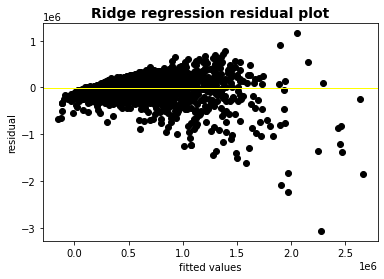

In [104]:
#plotting the residual plots
plt.scatter(y_predridge,residuals,color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y=residuals.mean(),color='yellow',linewidth=1)
plt.title('Ridge regression residual plot',fontsize=14,weight='bold')
plt.show()

> #### Checking for heteroscedasticity: Bartlett's test

In [70]:
test_result, p_value = sp.stats.bartlett(y_predridge.flatten(), residuals.flatten())#used the flatten function to copy the values as one dimensional

#degrees of freedom
df = len(y_predridge) - 1
probability = 1 - p_value
critical_val = sp.stats.chi2.ppf(probability,df)

#deciding whether to reject or fail to reject the null hypothesis
# basing it on test value and critical value
if (test_result > critical_val):
  print('The variances are unequal')
else:
    print('The variances are homogenous')

The variances are homogenous


The variance for the ridge model is homogenous and centered around the mean of 0

### Lasso Regression

> *  Without cross validation

In [73]:
x = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']].values
y = house['price'].values

#scaling the features
sc = StandardScaler()
sc.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [74]:
#splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
lasso = Lasso()
lasso.fit(x,y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [75]:
#printing scores
print('Lasso score: ',lasso.score(x,y))
print('Mean squared error: ',mean_squared_error(y,lasso.predict(x)))
print('Root Mean Squared Error ',np.sqrt(mean_squared_error(y,lasso.predict(x))))
print('Lasso coefficients ',lasso.coef_)

Lasso score:  0.6998035694201614
Mean squared error:  40519386793.110054
Root Mean Squared Error  201294.27908688824
Lasso coefficients  [-3.57745096e+04  4.10854197e+04  2.85068186e+02  1.28090686e-01
  6.76508286e+03  5.82446663e+05  5.30421467e+04  2.64470808e+04
  9.60067220e+04 -1.03759462e+02 -1.34871373e+02 -2.62223156e+03
  2.00370791e+01 -5.82535375e+02  6.02829112e+05 -2.14650458e+05
  2.16736667e+01 -3.82397384e-01]


> * With cross validation

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42,test_size=0.2)
params = {'alpha': np.concatenate((np.arange(0.1,2,0.1),np.arange(2,5,0.5),np.arange(5,25,1)))}
gridlasso = GridSearchCV(lasso,params,scoring='r2')
gridlasso.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. ,
       13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 23. ,
       24. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [88]:
print('Grid lasso score:',gridlasso.score(x_test,y_test))
print('Grid Lasso mean squared error:',mean_squared_error(y_test,gridlasso.predict(x_test)))
print('Grid lasso root mean squared error:',np.sqrt(mean_squared_error(y_test,gridlasso.predict(x_test))))
print('Grid Lasso coefficients ',gridlasso.best_estimator_.coef_)

Grid lasso score: 0.7025866631213693
Grid Lasso mean squared error: 42390232893.53057
Grid lasso root mean squared error: 205888.88482268917
Grid Lasso coefficients  [-3.43796226e+04  3.95058965e+04  2.85541461e+02  5.66879637e-02
  6.27071203e+03  5.90831542e+05  5.21277266e+04  2.46153851e+04
  9.66656112e+04 -1.01816036e+02 -1.34591020e+02 -2.64274983e+03
  2.15858288e+01 -5.89008924e+02  5.94929180e+05 -2.06463228e+05
  1.84096874e+01 -3.68996538e-01]


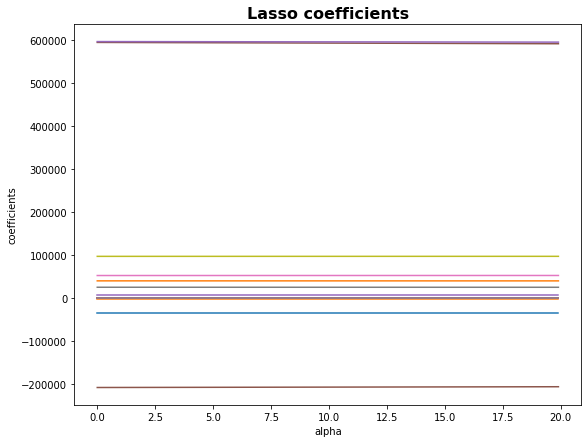

In [101]:
coefslasso = []
alphalasso = np.arange(0,20,0.1)
for i in range(200):
    lasso = Lasso(alpha = alphalasso[i])
    lasso.fit(x_train,y_train)
    coefslasso.append(lasso.coef_)

#building the coefficient plots
plt.figure(figsize=(20,7))

plt.subplot(121)
plt.plot(alphalasso,coefslasso)
plt.title('Lasso coefficients',fontsize=16,weight='bold')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

>> Lasso has reduced some of the regression coefficients  to exactly 0 as they dont have associations with price

> #### Residual plot:Lasso Regression

In [78]:
#getting the residual mean
y_predgridlasso = gridlasso.predict(x_test)
residuals = np.subtract(y_predgridlasso,y_test)
residuals.mean()

-4629.120765703393

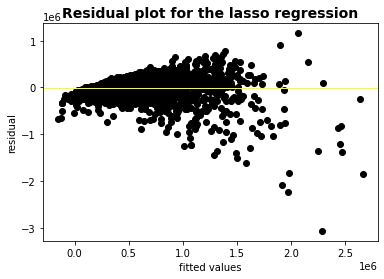

In [103]:
#plotting the residual plots
plt.scatter(y_predgridlasso,residuals,color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y=residuals.mean(),color='yellow',linewidth=1)
plt.title('Residual plot for the lasso regression',fontsize=14,weight='bold')
plt.show()

In [81]:
test_result, p_value = sp.stats.bartlett(y_predgridlasso, residuals)#used the flatten function to copy the values as one dimensional

#degrees of freedom
df = len(y_predgridlasso) - 1
probability = 1 - p_value
critical_val = sp.stats.chi2.ppf(probability,df)

#deciding whether to reject or fail to reject the null hypothesis
# basing it on test value and critical value
if (test_result > critical_val):
  print('The variances are unequal')
else:
    print('The variances are homogenous')

The variances are homogenous


There are no variations and variances are centered around the mean of 0.

>> **Results show**:
* Using lasso regression, the mean squared error without cross validation is lesser than  with cross validation
 * Lasso rmse is 201294.27908688824 and multiple linear rmse is 201294.2783248267 which are slightly similar. These scores are less than grid lasso rmse score of 205888.88482268917



**Limitation**
* Lasso cannot carry out feature selection, if the predictor variables are highly correlated lasso only picks high coefficients and shrinks low regression coefficients to 0


###Elastic Net Regression

In [111]:
#specifying the x and y variables
x = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y = house['price']
#normalizing, and using GridSearchCv to get the best parameters and best score for our model
elastic = ElasticNet(normalize=True)
search = GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,cv=10)
search.fit(x,y)
print(search.best_params_)
print(abs(search.best_score_))

{'alpha': 1e-05, 'l1_ratio': 0.8}
41058920151.34104


In [112]:
#using the recommended values to get the mean squared error and root mean squared error
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X,y)
print(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(np.sqrt(mean_squared_error(y_true=y,y_pred=elastic.predict(X))))

40619978074.37614
201543.9854582025


In [113]:
#getting the coefficients
coef_dict_base = {}
for coef,feat in zip(elastic.coef_,x.columns):
  coef_dict_base[feat] = coef

coef_dict_base

{'bathrooms': 40082.830143097766,
 'bedrooms': -30832.641706128412,
 'condition': 27748.707500677167,
 'floors': 9085.409363320086,
 'grade': 89153.9728092799,
 'lat': 583371.4178675867,
 'long': -206607.00871439464,
 'sqft_above': 87.4907631474782,
 'sqft_basement': 61.335674085187,
 'sqft_living': 85.36538035682388,
 'sqft_living15': 32.0927235885926,
 'sqft_lot': 0.12227137741472247,
 'sqft_lot15': -0.33789284260772373,
 'view': 53118.94925123262,
 'waterfront': 564763.9645380373,
 'yr_built': -2370.546942762645,
 'yr_renovated': 24.12250248354622,
 'zipcode': -497.24144965255465}

> #### Residual plot: ElasticNet Regression

In [114]:
#splitting the dataset into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
#fitting into the linear regression
le.fit(x_train,y_train)
#predicting test set
y_pred_elastic = elastic.predict(x_test)
#getting residuals.In this case, the difference between y_test(actual values) and y_pred(predicted values)
residuals = np.subtract(y_pred_elastic,y_test)

#getting the mean of the variables
residuals.mean()

-3791.6090065760845

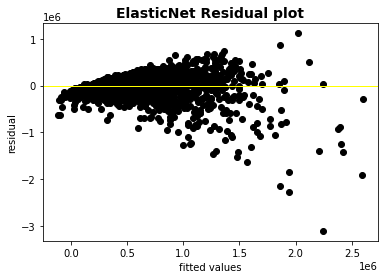

In [115]:
#plotting the residual plot
plt.scatter(y_pred_elastic,residuals,color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y=residuals.mean(),color='yellow',linewidth=1)
plt.title('ElasticNet Residual plot',fontsize=14,weight='bold')
plt.show()

> ####  Checking for heteroscedasticity: Bartlett's test

In [116]:
test_result, p_value = sp.stats.bartlett(y_pred_elastic, residuals)
#used the flatten function to copy the values as one dimensional

#degrees of freedom
df = len(y_pred_elastic) - 1
probability = 1 - p_value
critical_val = sp.stats.chi2.ppf(probability,df)

#deciding whether to reject or fail to reject the null hypothesis
# basing it on test value and critical value
if (test_result > critical_val):
  print('The variances are unequal')
else:
    print('The variances are homogenous')

The variances are homogenous


The variances are homogenous and centered around the mean

**Results show:**
* The Elastic net rmse 201543.9854582025 is slightly greater than 201294.2783248267. Multiple Linear Regression will perform better in this case.

**Limitation**
* ElasticNet Regression can lead to double shrinkage, which causes high high bias and poor predictions 

#### *In conclusion, multiple linear regression had the least rmse score implying its the most preferred model compared to other models.*

## 9. Follow up questions

### a). Did we have the right data?
We had the right data, the variables within the dataset was essential in making references to housing prices

### b). Do we need other data to answer our question?
It could be interesting to see if the models could achieve a better performance if variables such as mortgage availability was added.

### c). Did we have the right question?
Yes, the question was right the variables within the dataset all affect pricing.